In [ ]:
%matplotlib inline


# Topographic hillshading

Demonstrates the visual effect of varying blend mode and vertical exaggeration
on "hillshaded" plots.

Note that the "overlay" and "soft" blend modes work well for complex surfaces
such as this example, while the default "hsv" blend mode works best for smooth
surfaces such as many mathematical functions.

In most cases, hillshading is used purely for visual purposes, and *dx*/*dy*
can be safely ignored. In that case, you can tweak *vert_exag* (vertical
exaggeration) by trial and error to give the desired visual effect. However,
this example demonstrates how to use the *dx* and *dy* keyword arguments to
ensure that the *vert_exag* parameter is the true vertical exaggeration.


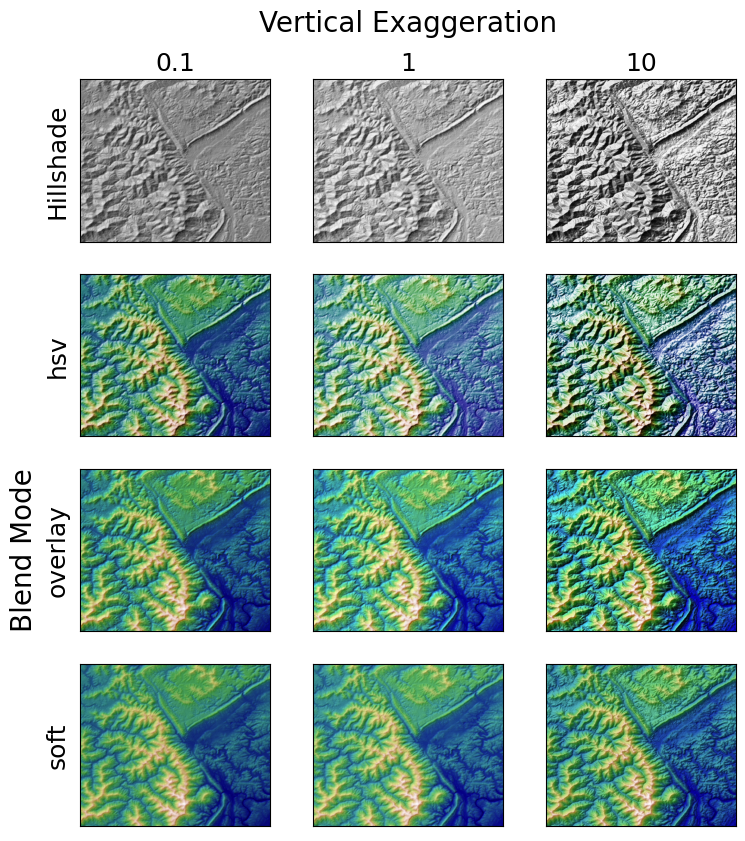

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cbook import get_sample_data
from matplotlib.colors import LightSource


dem = get_sample_data('jacksboro_fault_dem.npz', np_load=True)
z = dem['elevation']
# -- Optional dx and dy for accurate vertical exaggeration --------------------
# If you need topographically accurate vertical exaggeration, or you don't want
# to guess at what *vert_exag* should be, you'll need to specify the cellsize
# of the grid (i.e. the *dx* and *dy* parameters).  Otherwise, any *vert_exag*
# value you specify will be relative to the grid spacing of your input data
# (in other words, *dx* and *dy* default to 1.0, and *vert_exag* is calculated
# relative to those parameters).  Similarly, *dx* and *dy* are assumed to be in
# the same units as your input z-values.  Therefore, we'll need to convert the
# given dx and dy from decimal degrees to meters.
dx, dy = dem['dx'], dem['dy']
dy = 111200 * dy
dx = 111200 * dx * np.cos(np.radians(dem['ymin']))
# -----------------------------------------------------------------------------

# Shade from the northwest, with the sun 45 degrees from horizontal
ls = LightSource(azdeg=315, altdeg=45)
cmap = plt.cm.gist_earth

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(8, 9))
plt.setp(axs.flat, xticks=[], yticks=[])

# Vary vertical exaggeration and blend mode and plot all combinations
for col, ve in zip(axs.T, [0.1, 1, 10]):
    # Show the hillshade intensity image in the first row
    col[0].imshow(ls.hillshade(z, vert_exag=ve, dx=dx, dy=dy), cmap='gray')

    # Place hillshaded plots with different blend modes in the rest of the rows
    for ax, mode in zip(col[1:], ['hsv', 'overlay', 'soft']):
        rgb = ls.shade(z, cmap=cmap, blend_mode=mode,
                       vert_exag=ve, dx=dx, dy=dy)
        ax.imshow(rgb)

# Label rows and columns
for ax, ve in zip(axs[0], [0.1, 1, 10]):
    ax.set_title('{0}'.format(ve), size=18)
for ax, mode in zip(axs[:, 0], ['Hillshade', 'hsv', 'overlay', 'soft']):
    ax.set_ylabel(mode, size=18)

# Group labels...
axs[0, 1].annotate('Vertical Exaggeration', (0.5, 1), xytext=(0, 30),
                   textcoords='offset points', xycoords='axes fraction',
                   ha='center', va='bottom', size=20)
axs[2, 0].annotate('Blend Mode', (0, 0.5), xytext=(-30, 0),
                   textcoords='offset points', xycoords='axes fraction',
                   ha='right', va='center', size=20, rotation=90)
fig.subplots_adjust(bottom=0.05, right=0.95)

plt.show()